### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\P_Index_with_P_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['P_Index'])
Y = np.array(dataset['P_Value'])
print(X)
print(Y)

[0.00703939 0.0073076  0.00680586 ... 0.00868003 0.0176074  0.01053636]
[5.4 5.4 4.8 ... 5.  5.5 5.5]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[0.00703939]
 [0.0073076 ]
 [0.00680586]
 ...
 [0.00868003]
 [0.0176074 ]
 [0.01053636]] [[5.4]
 [5.4]
 [4.8]
 ...
 [5. ]
 [5.5]
 [5.5]]


### Standardization of input and output label

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)
print(X)
print(Y)

[[-0.53853951]
 [-0.39046109]
 [-0.66747584]
 ...
 [ 0.36726641]
 [ 5.29612002]
 [ 1.39215739]]
[[ 0.08677258]
 [ 0.08677258]
 [-0.39077583]
 ...
 [-0.23159302]
 [ 0.16636398]
 [ 0.16636398]]


### SVR model training

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

C:\Users\Mahmood Yousaf\.conda\envs\gpuEnv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Prediction 

In [7]:
prediction = regressor.predict(X)

In [8]:
prediction = prediction.reshape(len(prediction),1)
print(sc_Y.inverse_transform(prediction))

[[5.20722964]
 [5.27412853]
 [5.13964995]
 ...
 [4.96185578]
 [5.19785208]
 [5.08158156]]


### Visulization

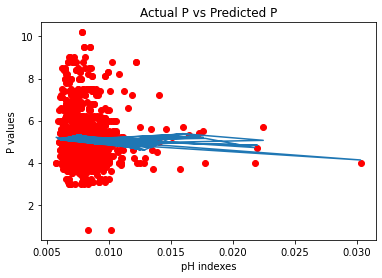

In [11]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(prediction))
plt.title("Actual P vs Predicted P")
plt.xlabel('pH indexes')
plt.ylabel('P values')
plt.savefig("SVRmodelForPestimationUsingpHindexes.jpg")